## Alucar - Análisando as vendas

In [480]:
import pandas as pd
import seaborn as sns
import sys
from  matplotlib import pyplot as plt
%matplotlib inline

In [481]:
dataBase = pd.read_csv('./dados/alucar.csv')

In [482]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [483]:
print('Quantidade de nulos: {}'.format(dataBase.isna().sum().sum()))

Quantidade de nulos: 0


In [484]:
# Serieis só trabalha com data, então fazemos uma conversão
dataBase['mes'] = pd.to_datetime(dataBase['mes'])

In [485]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


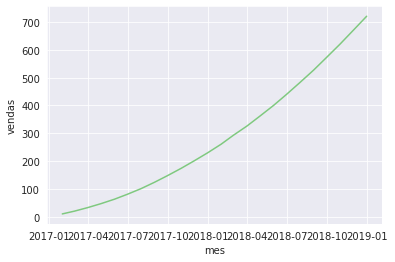

In [486]:
sns.lineplot(x='mes', y='vendas', data=dataBase )

### Melhorando a plotagem

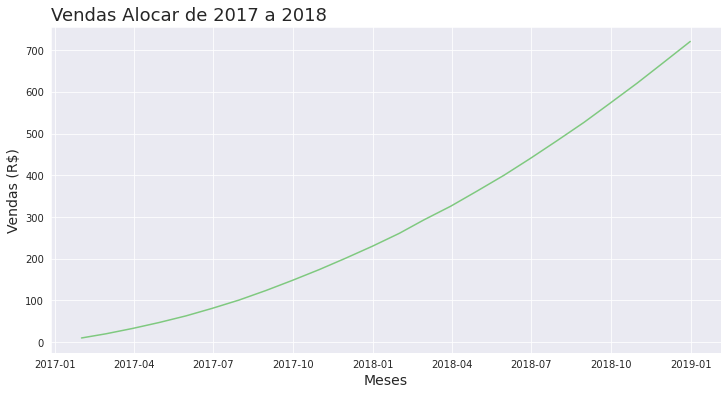

In [487]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=dataBase )
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alocar de 2017 a 2018', loc='left', fontsize=18)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax.set_xlabel('Meses', fontsize=14)
ax = ax  # para tirar a mensagem acima do table

In [488]:
## Pegaremos o mês 2, em que nossas vendas foram 20, e subtrairemos as vendas do mês 1, 10. 20 - 10 = 10.

dataBase['aumento'] = dataBase['vendas'].diff() # pego a venda do mês 2 e faço a conta mes2 - mes1 = total

In [489]:
dataBase.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


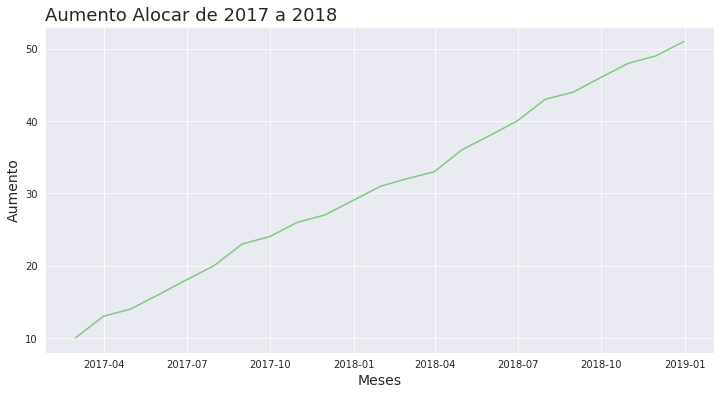

In [490]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=dataBase )
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento Alocar de 2017 a 2018', loc='left', fontsize=18)
ax.set_ylabel('Aumento', fontsize=14)
ax.set_xlabel('Meses', fontsize=14)
ax = ax  # para tirar a mensagem acima do table

#### Criando uma função para plotagem

In [491]:
def plotar(xlabel, ylabel, title, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax =sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize=18)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax = ax  # para tirar a mensagem acima do table

In [492]:
dataBase['aceleracao'] = dataBase['aumento'].diff()
dataBase.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


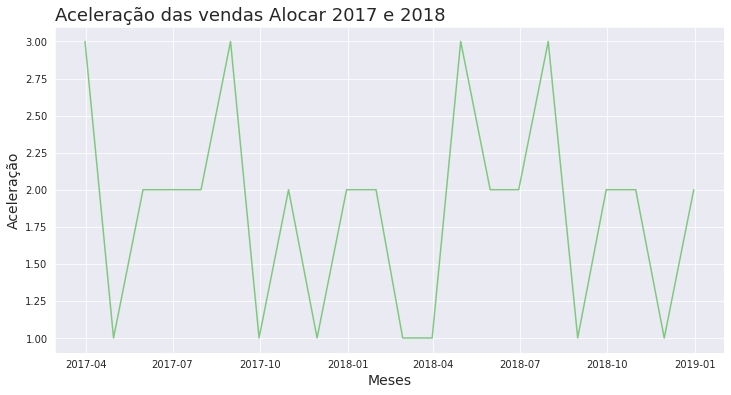

In [493]:
plotar('Meses', 'Aceleração','Aceleração das vendas Alocar 2017 e 2018','mes','aceleracao',dataBase)

### Plotando os 3 plots de uma vez

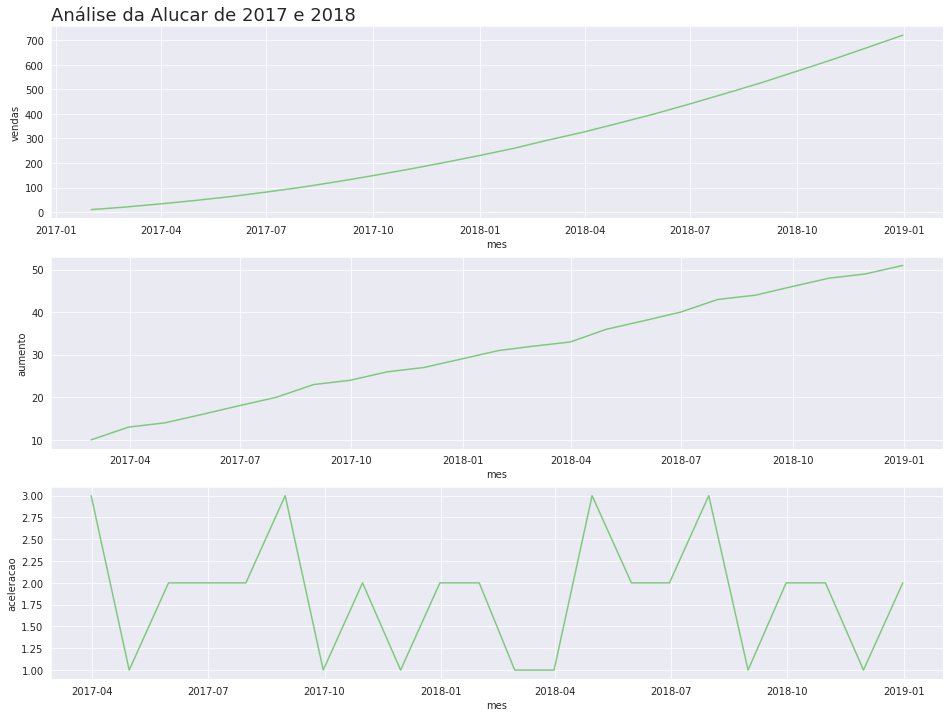

In [494]:
plt.figure(figsize=(16,12))  # Tamanho da figura
ax = plt.subplot(3, 1, 1) # 3 = dividir em 3 partes // 1 = ocupe todo o espaço // 1 = plot
ax.set_title('Análise da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=dataBase )
plt.subplot(3, 1, 2) # 3 = dividir em 3 partes // 1 = ocupe todo o espaço // 2 = plot
sns.lineplot(x='mes', y='aumento', data=dataBase )
plt.subplot(3, 1, 3) # 3 = dividir em 3 partes // 1 = ocupe todo o espaço // 3 = plot
sns.lineplot(x='mes', y='aceleracao', data=dataBase )
ax = ax

#### Crianção da função do plot de comparação

In [495]:
def plot_comparacao(x, y1, y2, y3, title, base):
    plt.figure(figsize=(16,12))  # Tamanho da figura
    ax = plt.subplot(3, 1, 1) # 3 = dividir em 3 partes // 1 = ocupe todo o espaço // 1 = plot
    ax.set_title(title, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=base )
    plt.subplot(3, 1, 2) # 3 = dividir em 3 partes // 1 = ocupe todo o espaço // 2 = plot
    sns.lineplot(x=x, y=y2, data=base )
    plt.subplot(3, 1, 3) # 3 = dividir em 3 partes // 1 = ocupe todo o espaço // 3 = plot
    sns.lineplot(x=x, y=y3, data=base )
    ax = ax

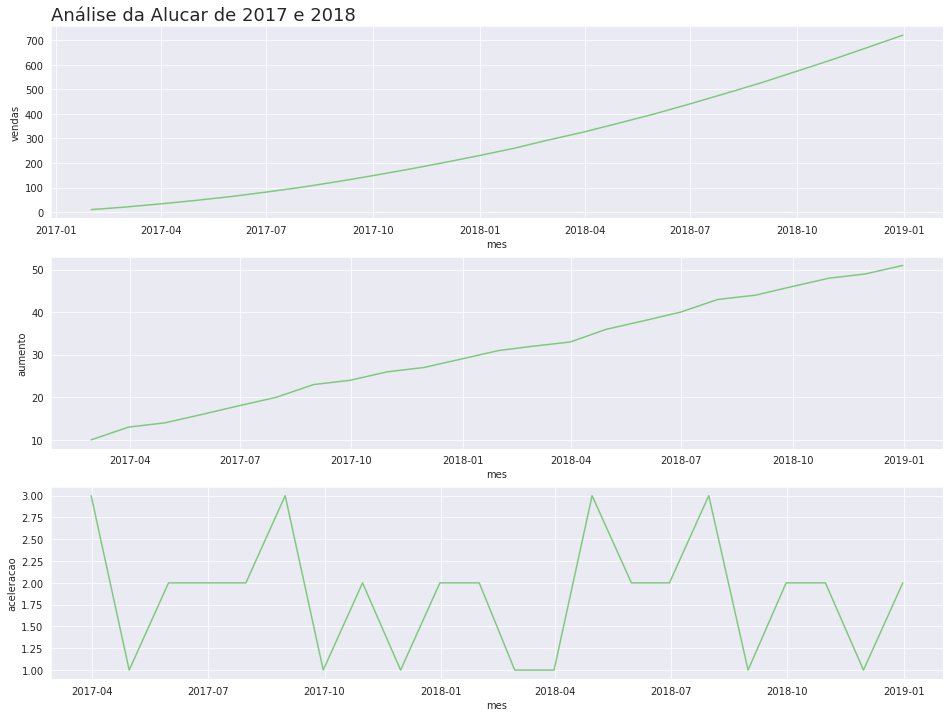

In [496]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 'Análise da Alucar de 2017 e 2018', dataBase)

####  Autocorrelação

In [497]:
from pandas.plotting import autocorrelation_plot as atc_plot

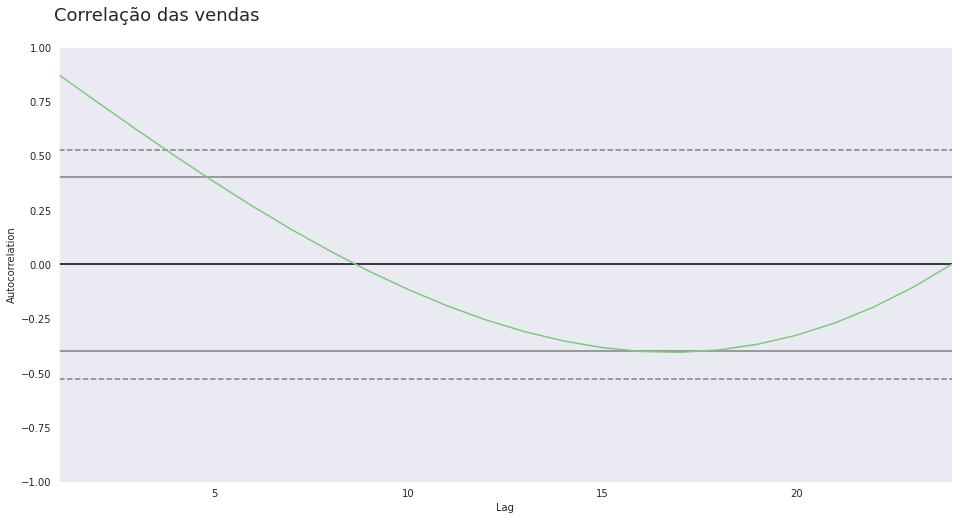

In [498]:
ax = plt.figure(figsize=(16, 8))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.21, y=0.95)
atc_plot(dataBase['vendas'])
ax = ax

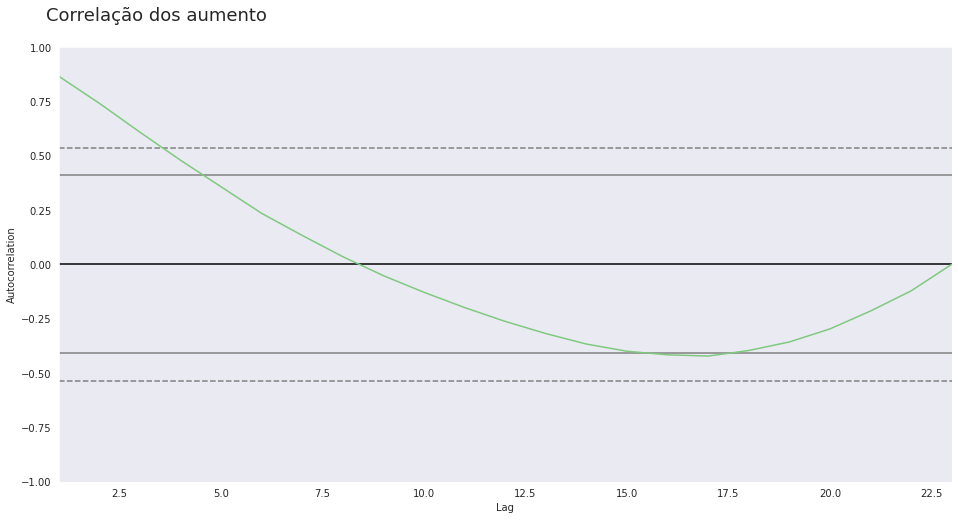

In [499]:
ax = plt.figure(figsize=(16, 8))
ax.suptitle('Correlação dos aumento', fontsize=18, x=0.21, y=0.95)
atc_plot(dataBase['aumento'][1:]) # a primeira linha começar com NA, então vamos começar da segunda [ index start with Zero ]
ax = ax

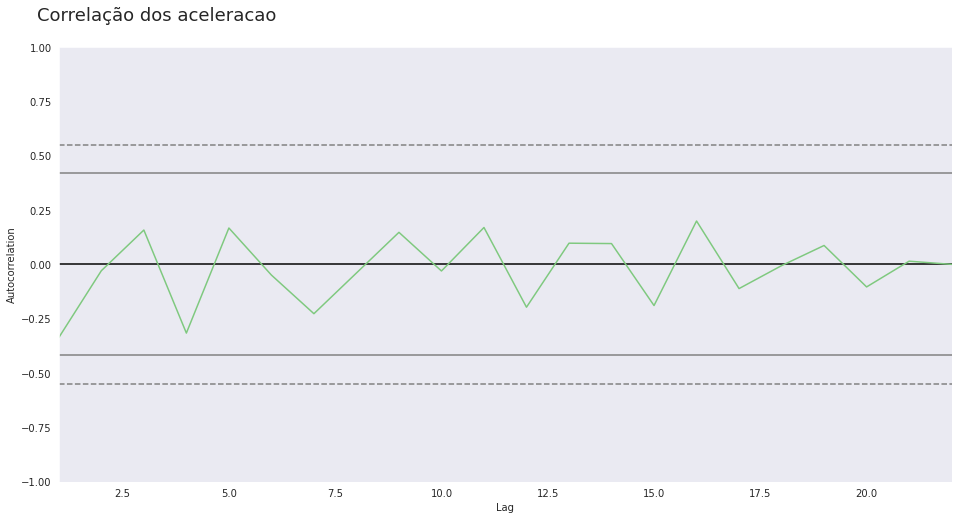

In [500]:
ax = plt.figure(figsize=(16, 8))
ax.suptitle('Correlação dos aceleracao', fontsize=18, x=0.21, y=0.95)
atc_plot(dataBase['aceleracao'][2:]) # as duas primeiras linhas começam com NA, então vamos começar da segunda [ index start with Zero ]
ax = ax

# Alucar - Analisando assinantes da newsletter

In [501]:
dataBase = pd.read_csv('./dados/newsletter_alucar.csv')

In [502]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [503]:
dataBase['mes'] = pd.to_datetime(dataBase['mes'])

In [504]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   mes         24 non-null     datetime64[ns]
 1   assinantes  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [505]:
print(f'Quantidade de linhas e colunas: {dataBase.shape}')
print(f'Quantidade de dados nulos: {dataBase.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [506]:
dataBase['aumento'] = dataBase['assinantes'].diff()
dataBase['aceleracao'] = dataBase['aumento'].diff()
dataBase.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


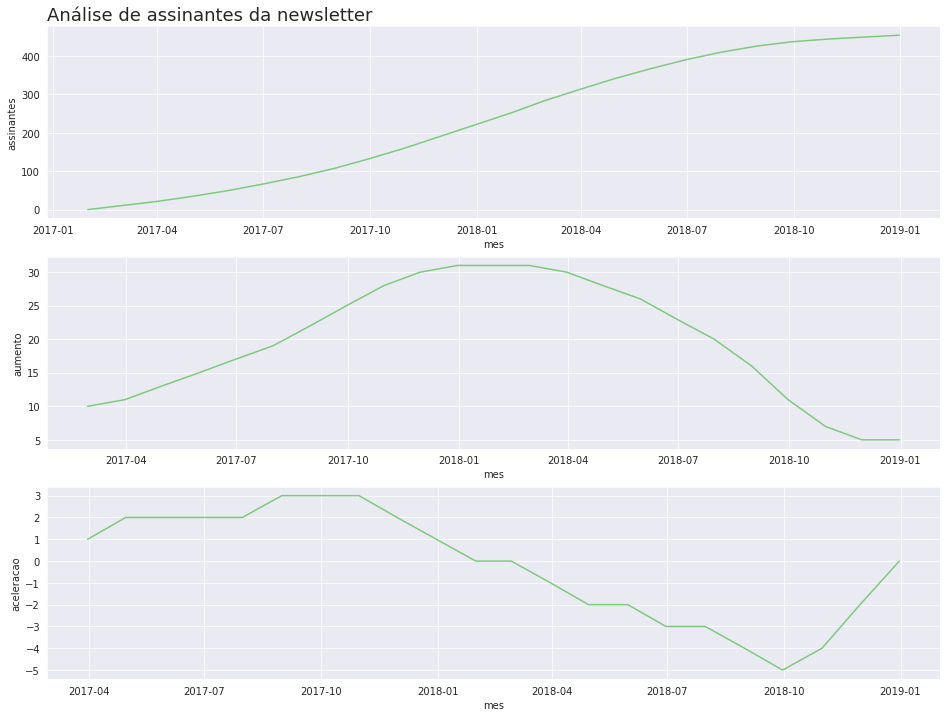

In [507]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', 'Análise de assinantes da newsletter', dataBase)

# Chocolura - Análise de produção

In [508]:
dataBase = pd.read_csv('./dados/chocolura.csv')

In [509]:
dataBase.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [510]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [511]:
print(f'Quantidade de linhas e colunas: {dataBase.shape}')
print(f'Quantidade de dados nulos: {dataBase.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [512]:
dataBase['mes'] = pd.to_datetime(dataBase['mes'])
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [513]:
dataBase['aumento'] = dataBase['vendas'].diff()
dataBase['aceleracao'] = dataBase['aumento'].diff()
dataBase.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


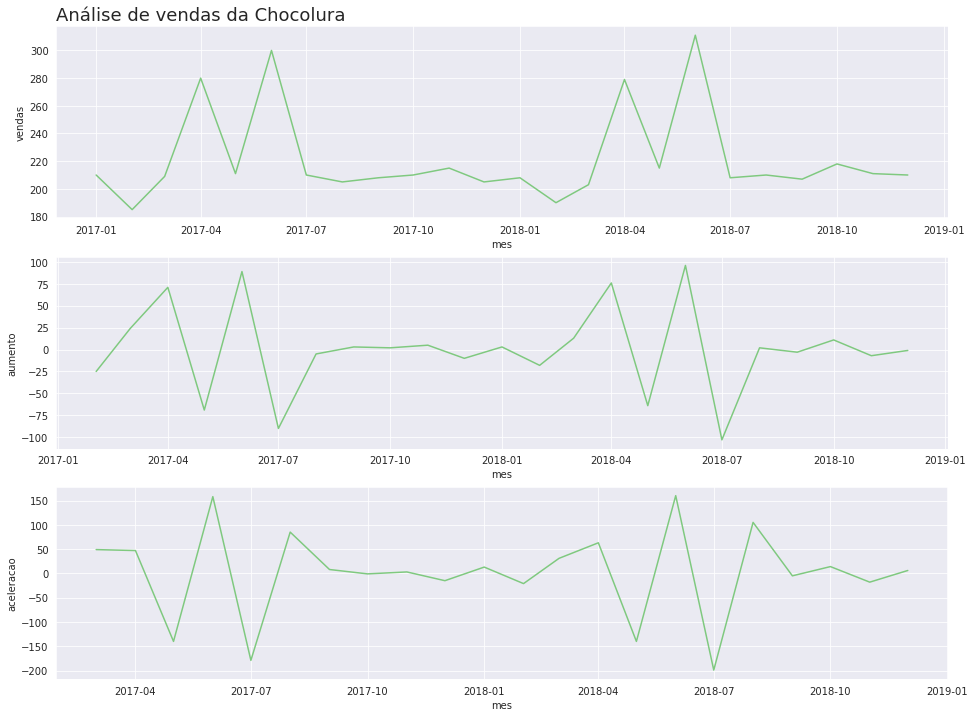

In [514]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', 'Análise de vendas da Chocolura', dataBase)

**Ou seja, temos uma Sazonalidade durante 2 meses depois voltar ao normal, dado que, no mês Abril temos a pascoa e em Maio temos 'o dia dos namorados'**

# Chocolura - Vendas diárias (Outubro e Novembro)

In [515]:
dataBase = pd.read_csv('./dados/vendas_por_dia.csv')

In [516]:
dataBase.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [517]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [518]:
print(f'Quantidade de linhas e colunas: {dataBase.shape}')
print(f'Quantidade de dados nulos: {dataBase.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [519]:
dataBase['dia'] = pd.to_datetime(dataBase['dia'])
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [520]:
dataBase['aumento'] = dataBase['vendas'].diff()
dataBase['aceleracao'] = dataBase['aumento'].diff()
dataBase.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


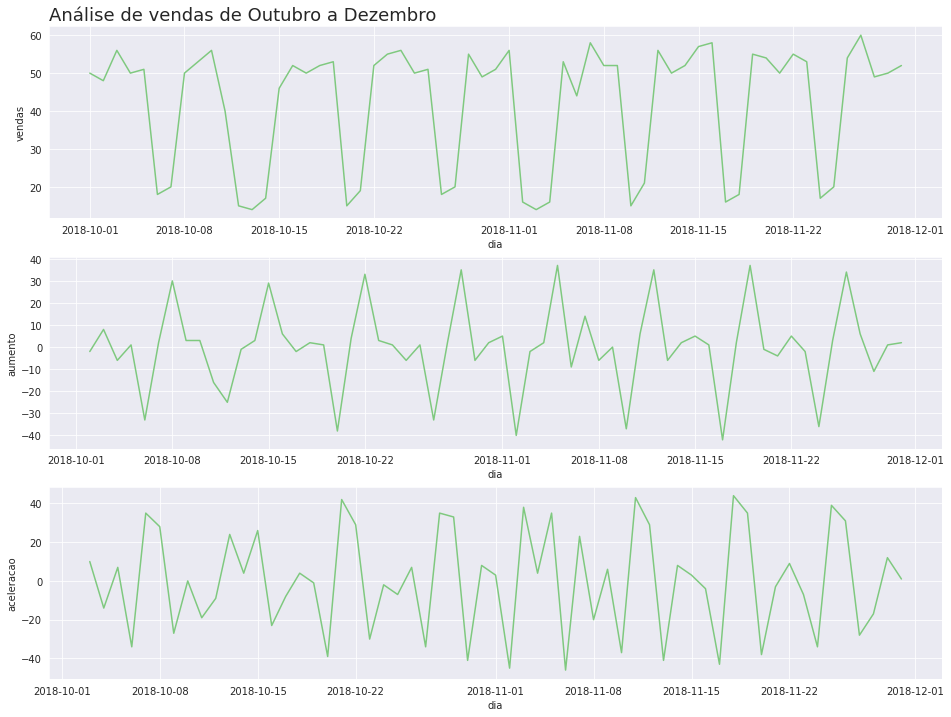

In [521]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 'Análise de vendas de Outubro a Dezembro', dataBase)

**Análisando a sazonalidade**

In [522]:
dataBase['Dia_Semana'] = dataBase['dia'].dt.day_name()  # Transforma as datas em dia.
dataBase.head()

,dia,vendas,aumento,aceleracao,Dia_Semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


**Tradução Dia_Semana**

In [523]:
week = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta'
        ,'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado'
        ,'Sunday':'Domingo'}

In [524]:
dataBase['Dia_Semana'] = dataBase['Dia_Semana'].map(week)
dataBase.head()

,dia,vendas,aumento,aceleracao,Dia_Semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


**Média das vendas por dia**

In [525]:
lista =['vendas','aumento','aceleracao']
dataBase.groupby('Dia_Semana')[lista].mean().round(0)

,vendas,aumento,aceleracao
Dia_Semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


**Correlação das vendas diárias**

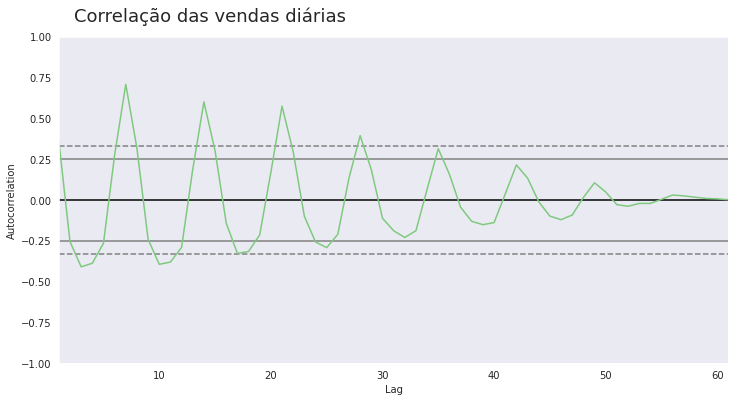

In [526]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
atc_plot(dataBase['vendas'])
ax = ax

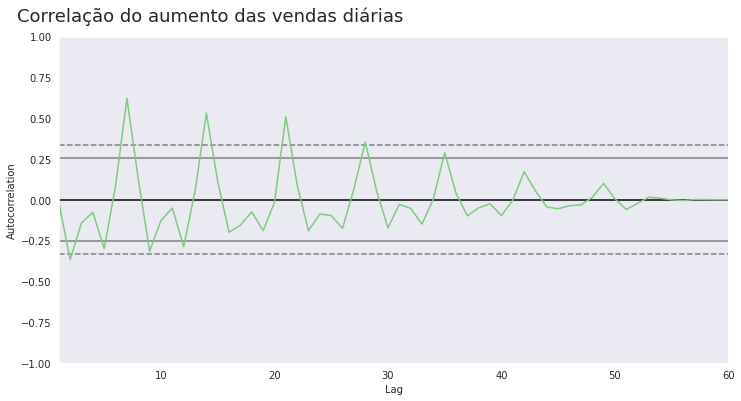

In [527]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
atc_plot(dataBase['aumento'][1:]) #primeiras linhas começam com NA, então vamos começar da segunda [ index start with Zero ]
ax = ax

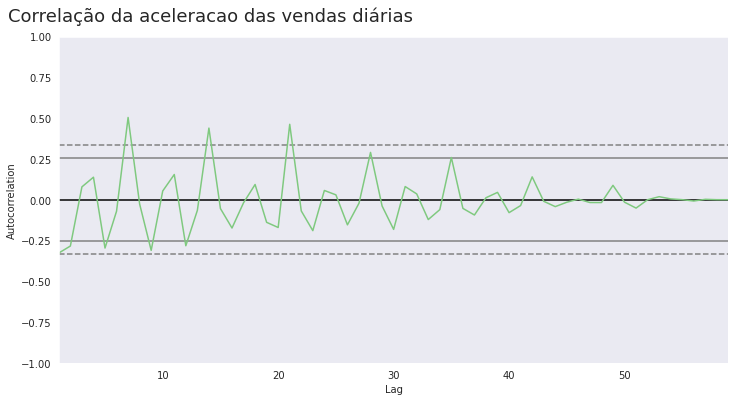

In [528]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleracao das vendas diárias', fontsize=18, x=0.3, y=0.95)
atc_plot(dataBase['aceleracao'][2:]) # as duas primeiras linhas começam com NA, então vamos começar da segunda [ index start with Zero ]
ax = ax

# Cafelura - Análise de vendas // Com normalização dos dados

In [529]:
dataBase = pd.read_csv('./dados/cafelura.csv')

In [530]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [531]:
print(f'Quantidade de linhas e colunas: {dataBase.shape}')
print(f'Quantidade de dados nulos: {dataBase.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [532]:
dataBase['mes'] = pd.to_datetime(dataBase['mes'])
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [533]:
dataBase['aumento'] = dataBase['vendas'].diff()
dataBase['aceleracao'] = dataBase['aumento'].diff()
dataBase.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


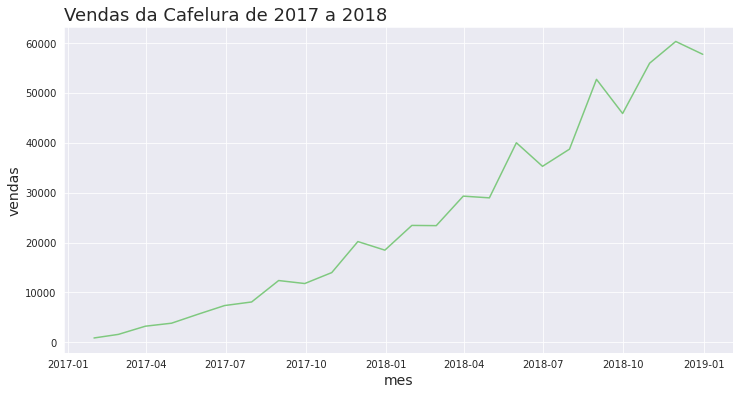

In [534]:
plotar('mes', 'vendas', 'Vendas da Cafelura de 2017 a 2018','mes', 'vendas', dataBase)

In [535]:
qtds_day_week = pd.read_csv('./dados/dias_final_de_semana.csv')
qtds_day_week.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [536]:
dataBase['V_normalizadas'] = dataBase['vendas'] / qtds_day_week['quantidade_de_dias']
dataBase.head()

,mes,vendas,aumento,aceleracao,V_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


**Nesse caso, a técnica de normalização seria a mais indicada. Sempre que estiver acompanhando números agregados em uma time series como resultados semanais, mensais ou trimestrais, podemos utilizar a técnica de normalização.**

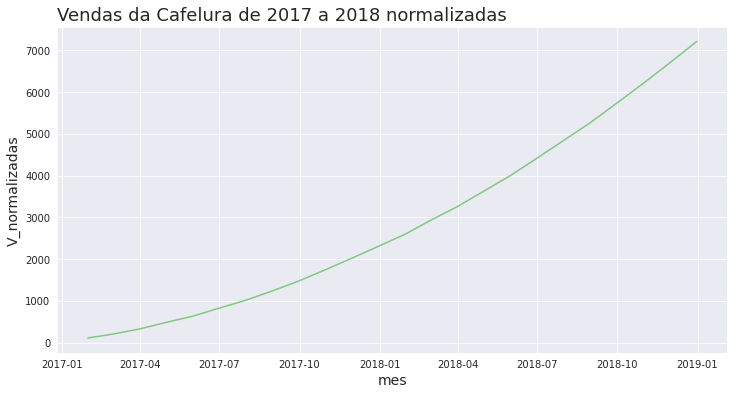

In [537]:
plotar('mes', 'V_normalizadas', 'Vendas da Cafelura de 2017 a 2018 normalizadas','mes', 'V_normalizadas', dataBase)

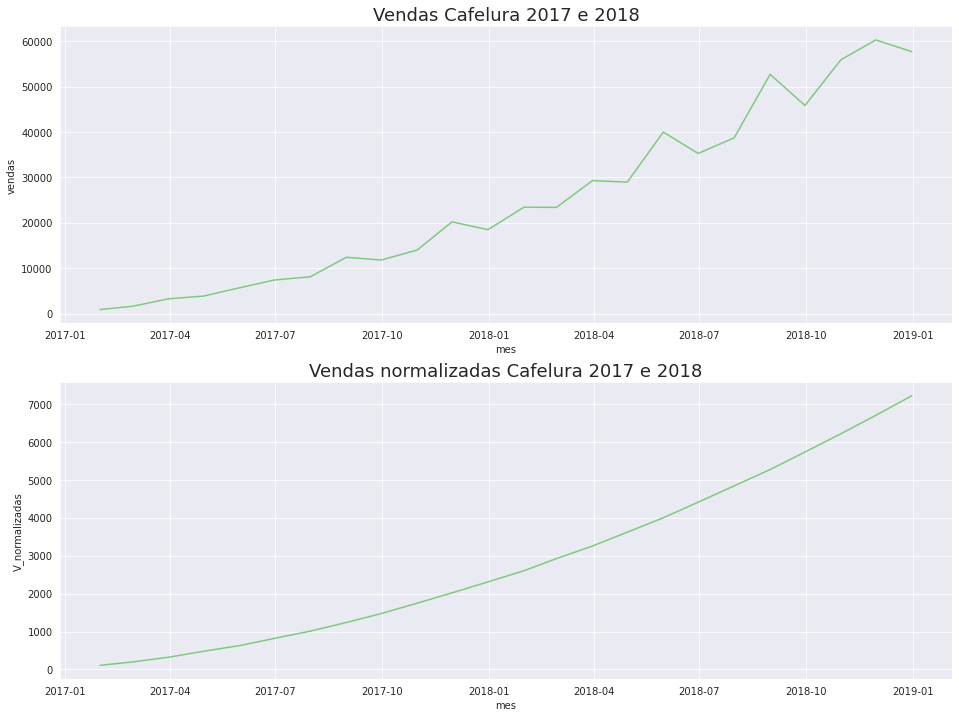

In [538]:
plt.figure(figsize=(16,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=dataBase)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='V_normalizadas', data=dataBase)
ax=ax 

# Statsmodel

In [539]:
from statsmodels.tsa.seasonal import seasonal_decompose # Fazer os dados dizerem se tem tendência, sazonalidade, ruido, ou se precisam ser normalizados

In [540]:
chocolura = pd.read_csv('./dados/chocolura.csv')
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

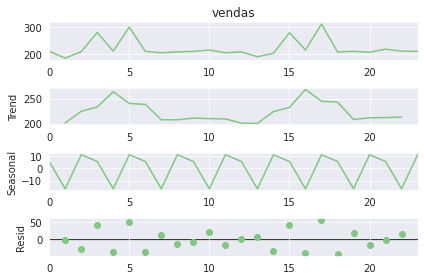

In [541]:
resultado = seasonal_decompose(chocolura['vendas'] ,period=3)
ax = resultado.plot()



In [542]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [543]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


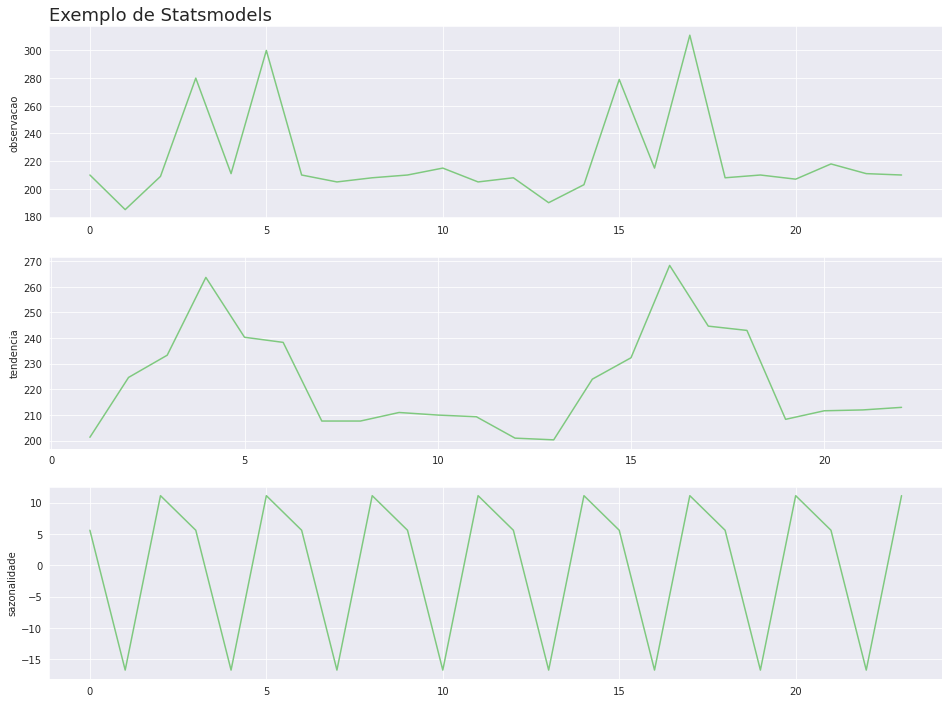

In [544]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', 'Exemplo de Statsmodels',resultado)

# Alucel - Análise de vendas

#### Ruído de uma time series

In [545]:
dataBase = pd.read_csv('./dados/alucel.csv')
dataBase.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [546]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dia     61 non-null     object 
 1   vendas  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [547]:
dataBase['dia'] = pd.to_datetime(dataBase['dia'])
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [548]:
print(f'Quantidade de linhas e colunas: {dataBase.shape}')
print(f'Quantidade de dados nulos: {dataBase.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [549]:
dataBase['aumento'] = dataBase['vendas'].diff()
dataBase['aceleracao'] = dataBase['aumento'].diff()
dataBase.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


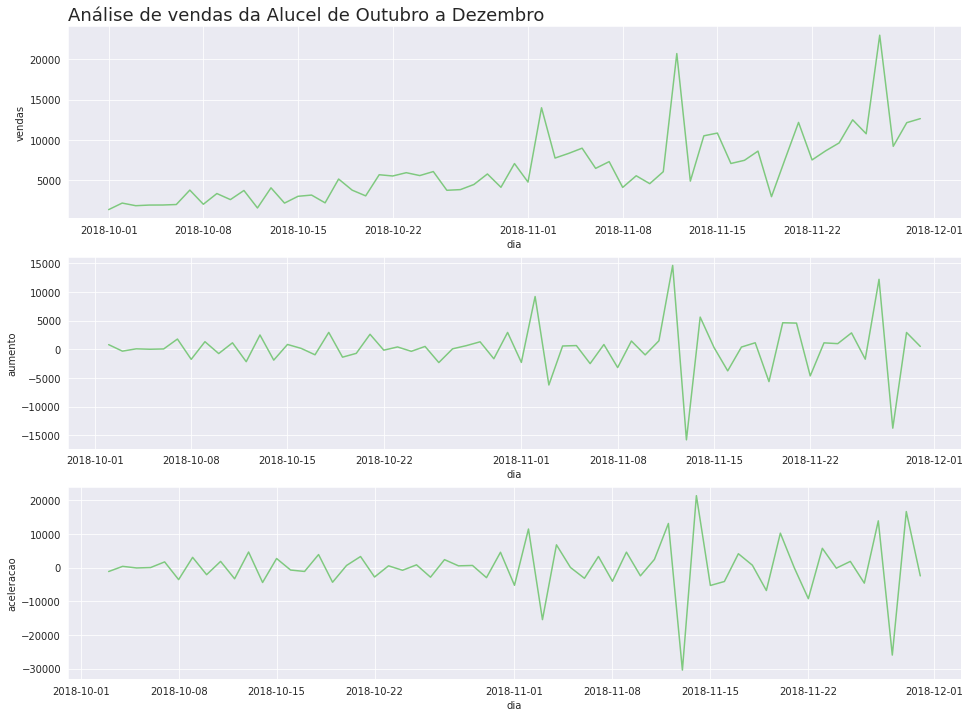

In [550]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', 'Análise de vendas da Alucel de Outubro a Dezembro ', dataBase)

#### Média móvel

In [553]:
dataBase['media_movel'] = dataBase['vendas'].rolling(7).mean().round(2)  # essa função do pandas calcula a média móvel // rolling(7) = média dos 7 dias

In [554]:
dataBase

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.84
57,2018-11-27,22984.56,12211.03,13937.49,12037.21
58,2018-11-28,9216.26,-13768.30,-25979.33,11614.00
59,2018-11-29,12147.61,2931.35,16699.65,12273.43


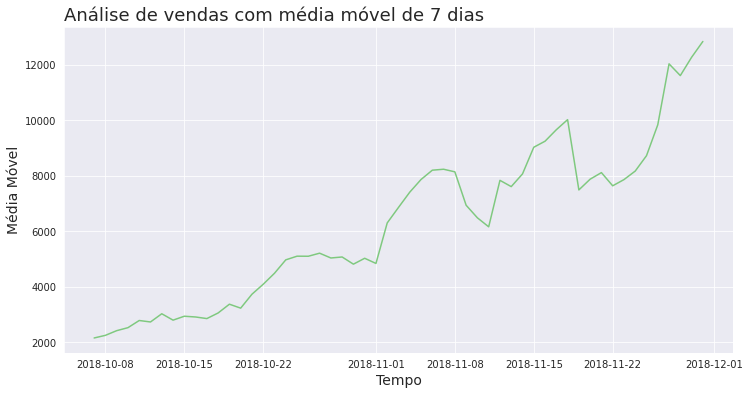

In [557]:
plotar('Tempo', 'Média Móvel', 'Análise de vendas com média móvel de 7 dias', 'dia', 'media_movel', dataBase)

In [558]:
dataBase['media_movel_21'] = dataBase['vendas'].rolling(21).mean().round(2)  # essa função do pandas calcula a média móvel // rolling(21) = média dos 21 dias

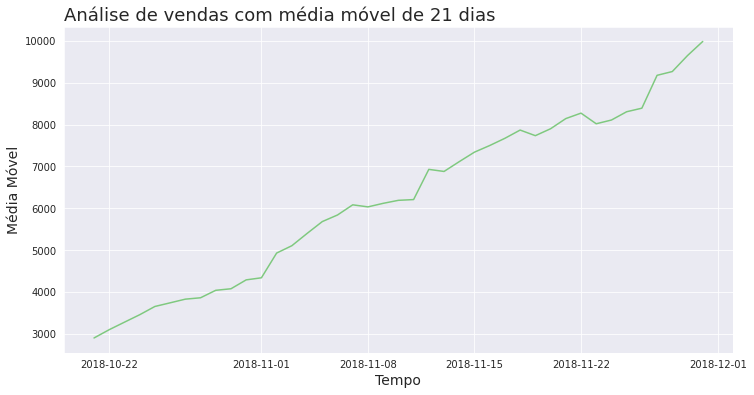

In [559]:
plotar('Tempo', 'Média Móvel', 'Análise de vendas com média móvel de 21 dias', 'dia', 'media_movel_21', dataBase)

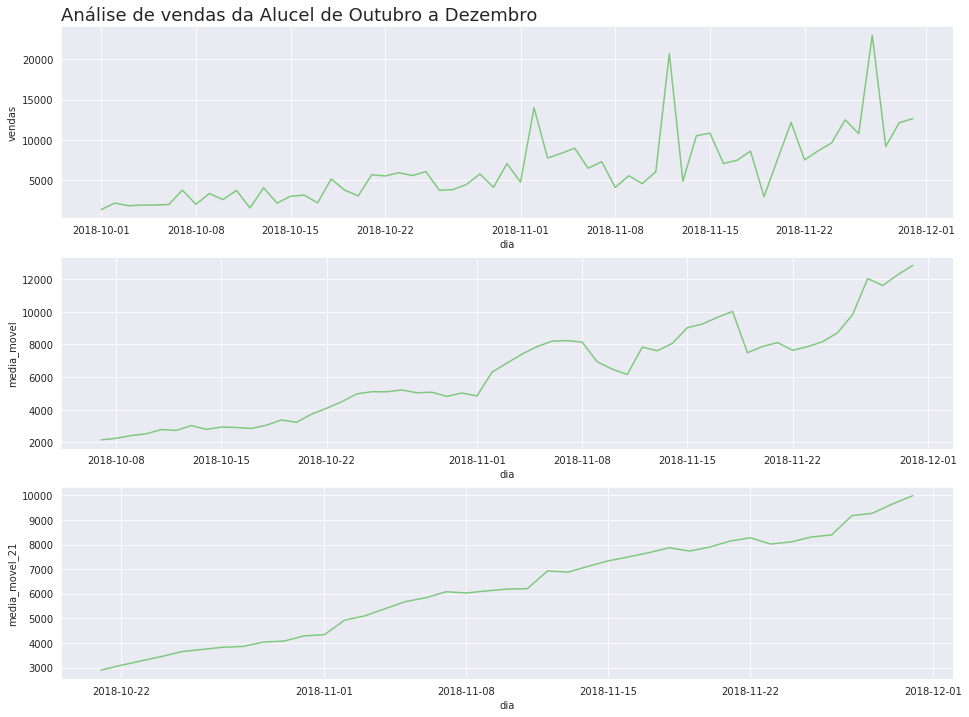

In [560]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', 'Análise de vendas da Alucel de Outubro a Dezembro ', dataBase)